In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
%matplotlib inline

np.random.seed(42)

In [2]:

# Create arrays with filenames and lables
inFile = open("C:/Users/Lukas/Desktop/commaai-speed-challenge/data/train-optical-flow.txt", "r")

all_images = []
all_labels = []
for i, v in enumerate(inFile):
    all_images.append(str(i)+".jpg")
    all_labels.append(float(v))


In [3]:
train_images, val_images, test_images = all_images[: 14280], all_images[14280 : 18360], all_images[18360 :]
train_labels, val_labels, test_labels = all_labels[: 14280], all_labels[14280 : 18360], all_labels[18360 :]

In [4]:
import random

rand_train = list(zip(train_images, train_labels))
random.shuffle(rand_train)
train_images, train_labels = zip(*rand_train)

rand_val = list(zip(val_images, val_labels))
random.shuffle(rand_val)
val_images, val_labels = zip(*rand_val)

test_rand = list(zip(test_images, test_labels))
random.shuffle(test_rand)
test_images, test_labels = zip(*test_rand)

In [5]:
train_images = np.array(train_images)
train_labels = np.array(train_labels)

val_images = np.array(val_images)
val_labels = np.array(val_labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [6]:
IMG_DIM = (150, 150)

train_images_array = [img_to_array(load_img("C:/Users/Lukas/Desktop/commaai-speed-challenge/data/frames/train-optical-flow/"+img, target_size=IMG_DIM)) for img in train_images]
train_images_array = np.array(train_images_array)

val_images_array = [img_to_array(load_img("C:/Users/Lukas/Desktop/commaai-speed-challenge/data/frames/train-optical-flow/"+img, target_size=IMG_DIM)) for img in val_images]
val_images_array = np.array(val_images_array)

test_images_array = [img_to_array(load_img("C:/Users/Lukas/Desktop/commaai-speed-challenge/data/frames/train-optical-flow/"+img, target_size=IMG_DIM)) for img in test_images]
test_images_array = np.array(test_images_array)

print('Train dataset shape:', train_images_array.shape, '\tValidation dataset shape:', val_images_array.shape, '\tTest dataset shape:', test_images_array.shape)


Train dataset shape: (14280, 150, 150, 3) 	Validation dataset shape: (4080, 150, 150, 3) 	Test dataset shape: (2038, 150, 150, 3)


In [50]:
train_imgs_scaled = train_images_array.astype('float32')
val_imgs_scaled  = val_images_array.astype('float32')
test_imgs_scaled  = test_images_array.astype('float32')
train_imgs_scaled /= 255
val_imgs_scaled /= 255
test_imgs_scaled /= 255

print(train_images_array[0].shape)
array_to_img(train_images_array[0])

KeyboardInterrupt: 

In [8]:
from keras.applications import vgg16
from keras.models import Model
import keras
import pandas as pd

In [9]:
#24 devides all datasets
batch_size = 24
epochs = 20
input_shape = (150, 150, 3)

In [10]:
vgg = vgg16.VGG16(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

In [11]:
output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)


In [12]:
vgg_model.trainable = False
for layer in vgg_model.layers:
    layer.trainable = False

In [13]:
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])    

,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x0000026ED8FCF370>,input_1,False
1,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000026E80FF8A30>,block1_conv1,False
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000026ED40BC250>,block1_conv2,False
3,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000026E80FF8EB0>,block1_pool,False
4,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000026ED4263520>,block2_conv1,False
5,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000026ED4262A30>,block2_conv2,False
6,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x0000026ED4271E50>,block2_pool,False
7,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000026ED4288F40>,block3_conv1,False
8,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000026ED4288100>,block3_conv2,False
9,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x0000026ED40FD550>,block3_conv3,False


(1, 4, 4, 512)


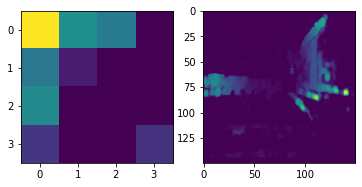

In [14]:
bottleneck_feature_example = vgg.predict(train_imgs_scaled[0:1])
print(bottleneck_feature_example.shape)

plt.subplot(1, 2, 1)
plt.imshow(bottleneck_feature_example[0][:,:,0])
plt.subplot(1, 2, 2)
plt.imshow(train_imgs_scaled[0][:,:,0])

In [15]:
def get_bottleneck_features(model, input_imgs):
    features = model.predict(input_imgs, verbose=1)
    return features
    
train_features_vgg = get_bottleneck_features(vgg_model, train_imgs_scaled)
val_features_vgg = get_bottleneck_features(vgg_model, val_imgs_scaled)

print('Train Bottleneck Features:', train_features_vgg.shape, 
      '\tValidation Bottleneck Features:', val_features_vgg.shape)

128/128 [==============================] - 457s 4s/step
Train Bottleneck Features: (14280, 8192) 	Validation Bottleneck Features: (4080, 8192)


In [16]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

In [17]:
input_shape = vgg_model.output_shape[1]
input_shape

8192

In [18]:
model = Sequential()
model.add(InputLayer(input_shape=(input_shape,)))
model.add(Dense(512, activation='relu', input_dim=input_shape))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))


In [19]:
model.compile(optimizer=optimizers.Adam(lr=1e-04), loss='mean_squared_error')


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 513       
Total params: 4,457,985
Trainable params: 4,457,985
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(x=train_features_vgg, y=train_labels,
                    validation_data=(val_features_vgg, val_labels),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/20
595/595 [==============================] - 21s 33ms/step - loss: 55.7631 - val_loss: 51.6371
Epoch 2/20
595/595 [==============================] - 18s 30ms/step - loss: 13.2882 - val_loss: 56.8652
Epoch 3/20
595/595 [==============================] - 18s 30ms/step - loss: 9.9267 - val_loss: 50.5284
Epoch 4/20
595/595 [==============================] - 18s 30ms/step - loss: 8.5921 - val_loss: 63.5747
Epoch 5/20
595/595 [==============================] - 18s 30ms/step - loss: 7.6440 - val_loss: 56.7852
Epoch 6/20
595/595 [==============================] - 17s 29ms/step - loss: 7.1843 - val_loss: 57.0685
Epoch 7/20
595/595 [==============================] - 17s 28ms/step - loss: 6.9406 - val_loss: 51.7008
Epoch 8/20
595/595 [==============================] - 20s 33ms/step - loss: 6.3175 - val_loss: 60.4826
Epoch 9/20
595/595 [==============================] - 22s 36ms/step - loss: 5.8422 - val_loss: 72.8854
Epoch 10/20
595/595 [==============================] - 18s 30ms/step - 

In [22]:
model.save('model_regression_frames.h5')

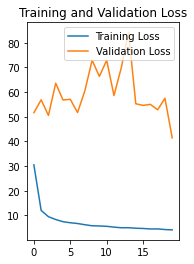

In [23]:
#plot results

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
test_bottleneck_features = get_bottleneck_features(vgg_model, test_imgs_scaled)


64/64 [==============================] - 250s 4s/step


In [25]:
results = model.evaluate(test_bottleneck_features, test_labels, batch_size=batch_size)


85/85 [==============================] - 1s 7ms/step - loss: 27.9703


In [35]:
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import numpy as np
import sys
import os
import argparse
import json
import shutil

In [37]:

test_model = Sequential()
test_model.add(Convolution2D(32, 8,8 ,padding='same', subsample=(4,4),input_shape=(input_shape,)))
test_model.add(Activation('relu'))
test_model.add(Convolution2D(64, 8,8 ,padding='same',subsample=(4,4)))
test_model.add(Activation('relu'))
test_model.add(Convolution2D(128, 4,4,padding='same',subsample=(2,2)))
test_model.add(Activation('relu'))
test_model.add(Convolution2D(128, 2,2,padding='same',subsample=(1,1)))
test_model.add(Activation('relu'))
test_model.add(Flatten())
test_model.add(Dropout(0.5))
test_model.add(Dense(128))
test_model.add(Activation('relu'))
test_model.add(Dropout(0.5))
test_model.add(Dense(128))
test_model.add(Dropout(0.5))
test_model.add(Dense(1))
test_model.compile(optimizer='adam', loss='mse')


ValueError: Input 0 of layer conv2d is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: (None, 8192)

In [84]:
from PIL import Image, ImageEnhance

frame2 = load_img("./frames/train/1000.jpg")
brightness = np.random.uniform(0.5, 1.5)
frame2 = ImageEnhance.Brightness(frame2).enhance(brightness)
frame2 = frame2.crop((0, 160, 640, 370)).resize((150,150))




frame2

FileNotFoundError: [Errno 2] No such file or directory: './frames/train/1000.jpg'